## From Jaynes

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Situation

A = box with 1/3 defective
B = box with 1/6 defective
C = box with 99/100 defective

Priors:
P(A|X) = 1/11(1-1e-6) ~1/11
P(B|X) = 10/11(1-1e-6) ~10/11
P(C|X) = 1e-6

In [138]:
def p_to_e(p):
    return 10 * np.log10(p / (1 - p))
def e_to_p(e):
    return 1 / (1 + 10**(-e / 10))
def p_to_surprise(p):
    return -np.log2(p)

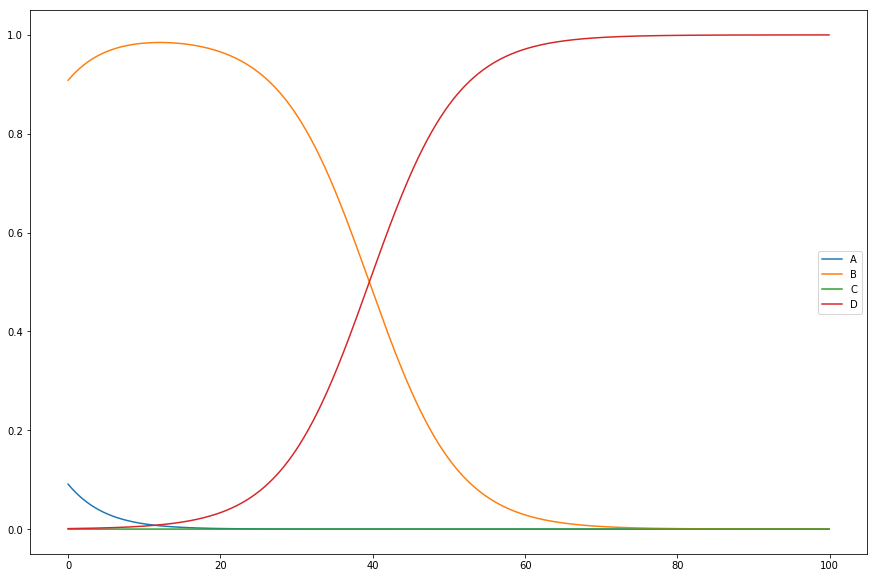

In [154]:
priors = np.array([1/11, 10/11, 1e-6, 1e-3])
priors = priors / priors.sum()
priors_o = priors / (1 - priors)
priors_e = 10*np.log10(priors_o)
hypotheses = np.array([1/3, 1/6, 99/100, 1/100])

def evidence(defects, total):
    # computes probability of data if H_i is true
    d_hi = hypotheses**defects * (1 - hypotheses)**(total - defects)
    # computes probability of data given H_i not true
    d_nhi = np.dot(priors, d_hi) / (1 - priors) - d_hi * priors_o
    # returns evidence - log-odds in decibels.
    return priors_e + 10*np.log10(d_hi / d_nhi)

N = 100
plt.figure(figsize=(15, 10))
evidence_t = []
xs = np.arange(0, N, 0.1)
for n in xs:
    evidence_t.append(evidence(0, n))
evidence_t = np.array(evidence_t).T
for i in range(len(hypotheses)):
    result = evidence_t[i]
    result = e_to_p(result)
#     result = p_to_surprise(result)
    plt.plot(xs, result, label='ABCDEFGHIJKLMNOPQRSTUVWXYZ'[i])
plt.legend()
plt.show()

## Experiment: Bayesian divergence of opinions

Play around with inference.

Consider two people, Mr. A and Mr. B, who wish to reason about a proposition $S$. Now consider datum $\{D_1, ..., D_n\}$, from a source which purports to support $S$, where Mr. A believes that the source is lying, and Mr. B believes it is telling the truth. Let $P(S|I_A) = P(S|I_B) = 1/2$, and we want to focus on the quantity $\log(P(S|I_A) / P(S|I_B))$, the log-ratio of their beliefs.

In [4]:
def log_ratio(x, y):
    return np.log(x / y)

S_A = 1/2
S_B = 1/2

print(log_ratio(S_A, S_B))

0.0


The definition of lying is that someone knows something is true, but says it is false. Therefore let the proposition $L$ stand for "the source is lying". Then $L_k = D_k\overline{S} + \overline{D_k}S$. Let

$$P(L_k|I_A) = l_A, \quad P(L_k|I_B) = l_B$$

Then

$$P(D_k | S I_A) = 1 - P(\overline{D_k} + F | S I_A) = 1 - P(\overline{D_k}S + D_k\overline{S} | S I_A) = 1 - P(L_k | S I_A) = 1 - \frac{P(S|L_k I_A) P(L_k | I_A)}{P(S | I_A)}$$

To encode the fact that Mr. A believes the source is lying, we let

$$P(D_k|S I_A) = 